# File Field Analysis

looking at the fields in each of the file types.

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import os.path
import re

def file_overview(path):
    df_file = pd.read_csv(path, sep="\t")
    filename = os.path.basename(path)
    m = re.search('([^\d]+)\d*\.txt', filename)
    file_content = m.group(1)
    return pd.DataFrame(
        list(zip(
            [file_content] * len(df_file.columns),
            df_file.columns,
            [type(x) for x in df_file.ix[0,:]],
            [len(df_file[x].unique()) for x in df_file.columns],
            [df_file[x].unique() for x in df_file.columns],

        )),
        columns=['filename', 'fields', 'type', 'unique', 'first 3']
    )

## Column overview

**ATC_LookUp**
- what is ATC?
- what are the meanings of the codes?
- what can we use this for?

In [244]:
file_overview(glob.glob('../../MelbDatathon2017/Lookups/ATC*')[0])

,filename,fields,type,unique,first 3
0,ATC_LookUp,ATCLevel1Code,<class 'str'>,15,"[A, B, C, D, G, H, J, L, M, N, nan, P, R, S, V]"
1,ATC_LookUp,ATCLevel1Name,<class 'str'>,15,"[ALIMENTARY TRACT AND METABOLISM, BLOOD AND BL..."
2,ATC_LookUp,ATCLevel2Code,<class 'str'>,86,"[A01, A02, A03, A04, A05, A06, A07, A08, A09, ..."
3,ATC_LookUp,ATCLevel2Name,<class 'str'>,86,"[STOMATOLOGICAL PREPARATIONS, DRUGS FOR ACID R..."
4,ATC_LookUp,ATCLevel3Code,<class 'str'>,194,"[A01A, A02A, A02B, A03A, A03B, A03F, A04A, A05..."
5,ATC_LookUp,ATCLevel3Name,<class 'str'>,193,"[STOMATOLOGICAL PREPARATIONS, ANTACIDS, DRUGS ..."
6,ATC_LookUp,ATCLevel4Code,<class 'str'>,494,"[A01AB, A01AC, A01AD, A02AB, A02AC, A02AD, A02..."
7,ATC_LookUp,ATCLevel4Name,<class 'str'>,465,[ANTIINFECTIVES AND ANTISEPTICS FOR LOCAL ORAL...
8,ATC_LookUp,ATCLevel5Code,<class 'str'>,1315,"[A01AB03, A01AB04, A01AB08, A01AB11, A01AC03, ..."
9,ATC_LookUp,ATCLevel5Name,<class 'str'>,1207,"[CHLORHEXIDINE, AMPHOTERICIN B, NEOMYCIN, VARI..."


**ChronicIllness_LookUp**
- full list of chronicillness is short

      ['Diabetes', 'Osteoporosis', 'Depression', 'Epilepsy', 'Lipids',
       'Hypertension', 'Heart Failure', 'Anti-Coagulant', 'Immunology',
       'Urology', 'Chronic Obstructive Pulmonary Disease (COPD)']

    - how can these be grouped?
    - cross referenced?
- a lookup to drug_lookup
    - is this complete?
    - how complete?
- full name is same as drug_lookup?

In [249]:
df_cill = pd.read_csv("../../MelbDatathon2017/Lookups/ChronicIllness_LookUp.txt", sep="\t")
print('unique illnesses: ', df_cill['ChronicIllness'].unique())
file_overview(glob.glob('../../MelbDatathon2017/Lookups/Chro*')[0])

unique illnesses:  ['Diabetes' 'Osteoporosis' 'Depression' 'Epilepsy' 'Lipids' 'Hypertension'
 'Heart Failure' 'Anti-Coagulant' 'Immunology' 'Urology'
 'Chronic Obstructive Pulmonary Disease (COPD)']


,filename,fields,type,unique,first 3
0,ChronicIllness_LookUp,ChronicIllness,<class 'str'>,11,"[Diabetes, Osteoporosis, Depression, Epilepsy,..."
1,ChronicIllness_LookUp,MasterProductID,<class 'numpy.int64'>,2207,"[141, 142, 146, 267, 269, 271, 272, 273, 296, ..."
2,ChronicIllness_LookUp,MasterProductFullName,<class 'str'>,2196,"[ACTOS TAB 30MG (AS HCL) 28 , ACTOS TAB 45MG (..."


**Drug lookup**
- product ids - 13,792 in total
- do master product codes match up to chronic_illness_lookup
- some categorisation - Ethical, Maufacturer
- Price - ChemistListPrice with a maximum price of $23,758.04
- link to ATC codes

In [248]:
df_drug = pd.read_csv("../../MelbDatathon2017/Lookups/Drug_LookUp.txt", sep="\t")
print("maximum price: ", df_drug['ChemistListPrice'].max())
file_overview(glob.glob('../../MelbDatathon2017/Lookups/Drug*')[0])

maximum price:  23758.04


,filename,fields,type,unique,first 3
0,Drug_LookUp,MasterProductID,<class 'numpy.int64'>,13792,"[7777, 9276, 5465, 12555, 7671, 13637, 5082, 1..."
1,Drug_LookUp,MasterProductCode,<class 'str'>,13792,"[SCH4, ZA13, MIXT1, METO45, S/P2, ENTE6, MAD8,..."
2,Drug_LookUp,MasterProductFullName,<class 'str'>,13581,"[SQUIBB HC OINT 1% 50G 1 , ZANTAC TAB 300MG 30..."
3,Drug_LookUp,BrandName,<class 'str'>,6747,"[SQUIBB HC, ZANTAC, THE MIXTURE, METOPROLOL (A..."
4,Drug_LookUp,FormCode,<class 'str'>,146,"[OINT, TAB, nan, SR-CAP, CAP, DRES, AMP, IV-SO..."
5,Drug_LookUp,StrengthCode,<class 'str'>,2804,"[1% 50G, 300MG, nan, 100MG, 1MG, 100MG/25MG, 4..."
6,Drug_LookUp,PackSizeNumber,<class 'numpy.float64'>,61,"[1.0, 30.0, 200.0, 60.0, 24.0, 100.0, 20.0, 10..."
7,Drug_LookUp,GenericIngredientName,<class 'str'>,1972,"[HYDROCORTISONE ACETATE, RANITIDINE, Not Appli..."
8,Drug_LookUp,EthicalSubCategoryName,<class 'str'>,8,"[NON PBS Substitutable, PBS Substitutable, Unk..."
9,Drug_LookUp,EthicalCategoryName,<class 'str'>,4,"[ETHICAL NON PBS, ETHICAL PBS, Unknown Categor..."


**patients**
- 0.5 million unique patients
- distributions
  - gender vs standard?
  
        {'F': 257706, 'M': 184550, 'U': 116096}
      
  - DOB - 520,535 in 1900
  - location vs regional/city? general location on a map?

gender:  Counter({'F': 257706, 'M': 184550, 'U': 116096})


,filename,fields,type,unique,first 3
0,patients,﻿Patient_ID,<class 'numpy.int64'>,558352,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,patients,gender,<class 'str'>,3,"[F, M, U]"
2,patients,year_of_birth,<class 'numpy.int64'>,95,"[1900, 1935, 1951, 1971, 1969, 1949, 1938, 195..."
3,patients,postcode,<class 'numpy.int64'>,2529,"[2516, 3042, 4750, 2765, 2229, 3162, 6150, 430..."


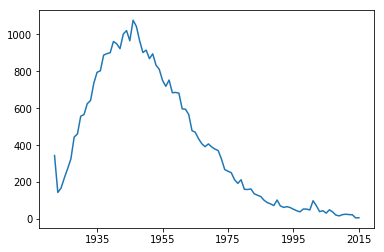

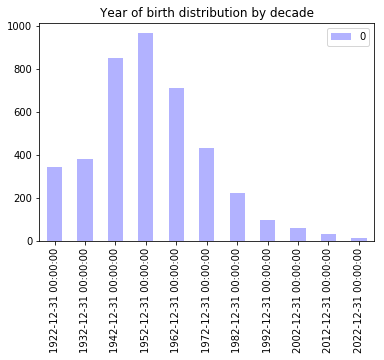

In [252]:
from collections import Counter
import datetime
df_pat = pd.read_csv("../../MelbDatathon2017/Lookups/patients.txt", sep="\t")
print('gender: ', Counter(df_pat['gender']))

# drop the first 1900 year
df_yob = pd.DataFrame(Counter(df_pat['year_of_birth']), index=[0]).transpose()[1:]
df_yob.index = pd.Series(df_yob.index).apply(pd.to_datetime, format='%Y')
plt.plot(df_yob)
df_yob.resample('10A').plot(kind='bar', alpha=0.3)
plt.title('Year of birth distribution by decade')

file_overview(glob.glob('../../MelbDatathon2017/Lookups/pat*')[0])

**stores**
- store id
- states
- postcodes
- IsBannerGroup? what is this?

In [253]:
file_overview(glob.glob('../../MelbDatathon2017/Lookups/stores*')[0])

,filename,fields,type,unique,first 3
0,stores,﻿Store_ID,<class 'numpy.int64'>,2822,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,stores,StateCode,<class 'str'>,8,"[VIC, WA, NSW, SA, ACT, QLD, TAS, NT]"
2,stores,postcode,<class 'numpy.float64'>,1170,"[3558.0, 3124.0, 6107.0, 3214.0, 3172.0, 2089...."
3,stores,IsBannerGroup,<class 'numpy.int64'>,2,"[0, 1]"


**transactions/patients**
- patient - presumably matches up with patient year of birth and postcode
- store id matches up with store
- prescriber_id? what is this?
- drug_id? what is this?
- sourceSystem_code? what is this?
- timing around prescription_week and dispense_week - for seasonal things?
- ...

In [255]:
# takes some time to load so loaded here and analysed in next cell
df_tran = pd.read_csv("../../MelbDatathon2017/Transactions/patients_1.txt", sep="\t")
file_overview(glob.glob('../../MelbDatathon2017/Transactions/patients*')[0])

,filename,fields,type,unique,first 3
0,patients_,Patient_ID,<class 'numpy.int64'>,11168,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,patients_,Store_ID,<class 'numpy.int64'>,2515,"[2739, 1961, 2556, 65, 1018, 431, 2143, 1519, ..."
2,patients_,Prescriber_ID,<class 'numpy.int64'>,23039,"[26728, 33477, 36460, 60446, 2619, 46760, 5249..."
3,patients_,Drug_ID,<class 'numpy.int64'>,4315,"[8208, 6085, 763, 6481, 5200, 7881, 8194, 7700..."
4,patients_,SourceSystem_Code,<class 'str'>,4,"[F, Z, C, A]"
5,patients_,Prescription_Week,<class 'str'>,382,"[2010-08-15, 2010-09-05, 2010-10-31, 2011-01-0..."
6,patients_,Dispense_Week,<class 'str'>,325,"[2011-01-02, 2011-01-23, 2011-01-30, 2011-02-2..."
7,patients_,Drug_Code,<class 'str'>,7407,"[SPIR3, NUEL1, ATAC1, PANT14, MELO10, SERT6, S..."
8,patients_,NHS_Code,<class 'str'>,1540,"[8626B, 8230E, 8295N, 8008L, 8562P, 2236Q, 200..."
9,patients_,IsDeferredScript,<class 'numpy.int64'>,2,"[0, 1]"


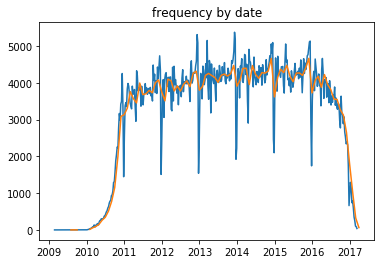

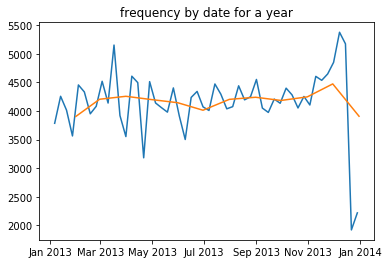

In [256]:
# print(Counter(df_tmp['Prescription_Week']))
df_tyob = pd.DataFrame(Counter(df_tran['Prescription_Week']), index=[0]).transpose()[1:]
df_tyob.index = pd.Series(df_tyob.index).apply(pd.to_datetime, format='%Y-%m-%d')
plt.plot(df_tyob)
plt.plot(df_tyob.resample("M"))
plt.title("frequency by date")
plt.show()
plt.plot(df_tyob['2013-01-01': '2013-12-31'])
plt.plot(df_tyob['2013-01-01': '2013-12-31'].resample("M"))
plt.title("frequency by date for a year")

# would be cool to overlay years
# plt.plot(df_tyob['2014-01-01': '2014-12-31'])
